### DATA COLLECTION AND PREPROCESSING

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [44]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 5

In [3]:
# Loading the dataset and specifying batch sizes
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
# So basically it classified them based on the name of the folder
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
# The tensorflow dataset gives us a generator so we have to loop over it to get values
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
# This method is used to access batches in the dataset 
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
# Because every batch contains 68 images so if we do 68*32(which is the number of batches) then we get approximately the size of our dataset because the last batch may not be complete or perfect
len(dataset)

68

In [8]:
for image_batch, label_batch in dataset.take(1):# Lets loop over the first batch 
    print(image_batch.shape) # Gives us 32 images and each has the size of the height and width whih in our case our images are 256X256 and then it will also give the rgb channel 3
    print(label_batch.numpy()) # every element is a tensor so we turn it to numpy array

(32, 256, 256, 3)
[0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 2 1 0 0 0 1 0 1 0 0 0 1 0 1 0]


In [9]:
for image_batch, label_batch in dataset.take(1):# Lets loop over the first batch 
    print(image_batch[0]) # The first image

tf.Tensor(
[[[172. 170. 175.]
  [169. 167. 172.]
  [172. 170. 175.]
  ...
  [193. 188. 194.]
  [226. 221. 227.]
  [175. 170. 176.]]

 [[172. 170. 175.]
  [168. 166. 171.]
  [170. 168. 173.]
  ...
  [160. 155. 161.]
  [179. 174. 180.]
  [165. 160. 166.]]

 [[174. 172. 177.]
  [170. 168. 173.]
  [170. 168. 173.]
  ...
  [161. 156. 162.]
  [162. 157. 163.]
  [158. 153. 159.]]

 ...

 [[158. 152. 156.]
  [155. 149. 153.]
  [156. 150. 154.]
  ...
  [130. 122. 120.]
  [133. 125. 123.]
  [129. 121. 119.]]

 [[154. 148. 152.]
  [151. 145. 149.]
  [153. 147. 151.]
  ...
  [151. 143. 141.]
  [149. 141. 139.]
  [153. 145. 143.]]

 [[148. 142. 146.]
  [145. 139. 143.]
  [148. 142. 146.]
  ...
  [144. 136. 134.]
  [139. 131. 129.]
  [148. 140. 138.]]], shape=(256, 256, 3), dtype=float32)


In [10]:
for image_batch, label_batch in dataset.take(1):# Lets loop over the first batch 
    print(image_batch[0].shape) # The first image shape,we get 256*256 image size then for because we have 3 channels the structure is that for each of the value we have 3 values

(256, 256, 3)


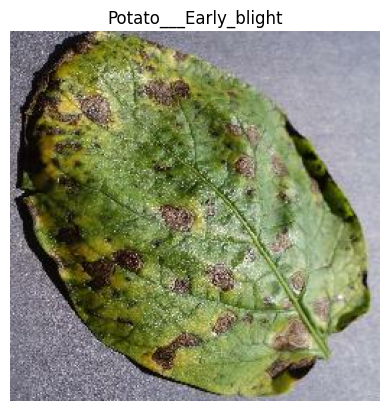

In [11]:
for image_batch, label_batch in dataset.take(1):# Lets loop over the first batch 
    plt.imshow(image_batch[0].numpy().astype("uint8"))# displaying the first image in the batch
    plt.title(class_names[label_batch[0]]) # The tensorflow dataset.take(1) which is the first batch gives us 2 arrays which is the image and then the label, here we went and take the first image in this batch and then we are indexing into class_names to get a word else it would just be tensor
    plt.axis("off") # So that it does not show x and y axis of the image

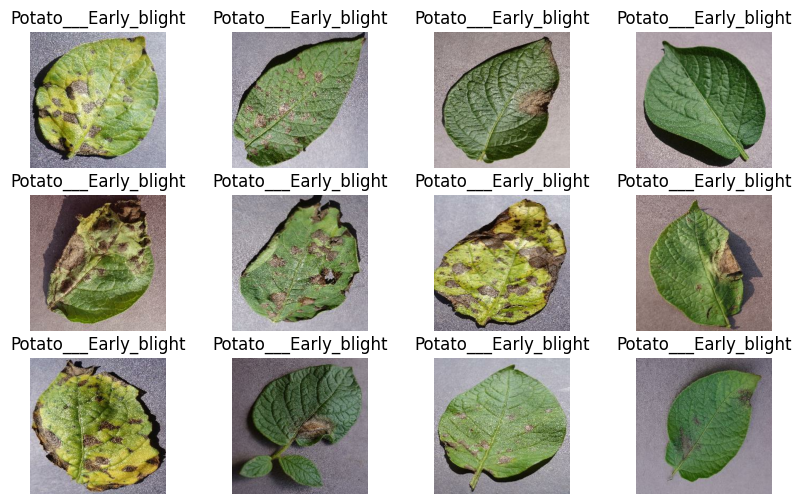

In [12]:
plt.figure(figsize=(10,6)) # To make the image bigger
for image_batch, label_batch in dataset.take(1):# Lets loop over the first batch 
    for i in range(12): # We want to see 12 images
        ax = plt.subplot(3,4,i+1) # make a subplot to show more images
        plt.imshow(image_batch[i].numpy().astype("uint8"))# displaying the first image in the batch
        plt.title(class_names[label_batch[0]]) # The tensorflow dataset.take(1) which is the first batch gives us 2 arrays which is the image and then the label, here we went and take the first image in this batch and then we are indexing into class_names to get a word else it would just be tensor
        plt.axis("off") # So that it does not show x and y axis of the image

In [13]:
# Splitting the dataset into
# 80% =>training
# 10% =>validation # W
# 10% =>testing # We use to test dataset to test our model to know the accuracy of the model

In [14]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [15]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [16]:
test_size = 0.1
len(dataset)*test_size

6.800000000000001

In [17]:
train_ds = dataset.take(54)# We set the first 54 images to be for train
len(train_ds)

54

In [18]:
test_ds = dataset.skip(54)# We skip the first 54 images since they are train and assign it as test dataset although we would still split it more to validation
len(test_ds)

14

In [19]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [20]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [21]:
# Let's write a function to do this
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [23]:
len(train_ds)

54

In [24]:
len(val_ds)

6

In [25]:
len(test_ds)

8

In [26]:
# Caching the training dataset, it will read the image from the disk and for the next iteration when you need the same image it will keep that image in the memory
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
# Scaling to get a number between 0 and 1 and resizing so that even if our user do not input image of shape 256X256 it will do that
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),# We are rescaling our image to 256*256 (although we know they are in that scale already) because when we are predicting after training if we supply an image that is not in that form it will handle it
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [28]:
# Data Augumentations
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

### MODEL BUILDING

In [29]:
# Declaring your architecture
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape),#The neural networks figures our the filter, just pass the shape and how many here we are using 32 and 3X3
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [30]:
model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [32]:
# Compiling your model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/5


54/54 [==============================] - 264s 5s/step - loss: 0.9020 - accuracy: 0.4931 - val_loss: 0.7799 - val_accuracy: 0.7188
Epoch 2/5
54/54 [==============================] - 269s 5s/step - loss: 0.6440 - accuracy: 0.7245 - val_loss: 0.4284 - val_accuracy: 0.8073
Epoch 3/5
54/54 [==============================] - 241s 4s/step - loss: 0.3865 - accuracy: 0.8322 - val_loss: 0.3398 - val_accuracy: 0.8698
Epoch 4/5
54/54 [==============================] - 205s 4s/step - loss: 0.3109 - accuracy: 0.8698 - val_loss: 0.3120 - val_accuracy: 0.8802
Epoch 5/5
54/54 [==============================] - 213s 4s/step - loss: 0.2520 - accuracy: 0.8987 - val_loss: 0.2842 - val_accuracy: 0.8854


In [34]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 14s 993ms/step - loss: 0.1798 - accuracy: 0.9336


In [35]:
scores

[0.1798340082168579, 0.93359375]

### PLOTTING THE ACCURACY AND LOSS CURVES

In [37]:
history # this is a callback that helps us track our model performance

In [38]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [40]:
type(history.history['loss'])

list

In [41]:
len(history.history['loss']) # for loss, accuracy, val we have the number of epochs as the number of values they have

5

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

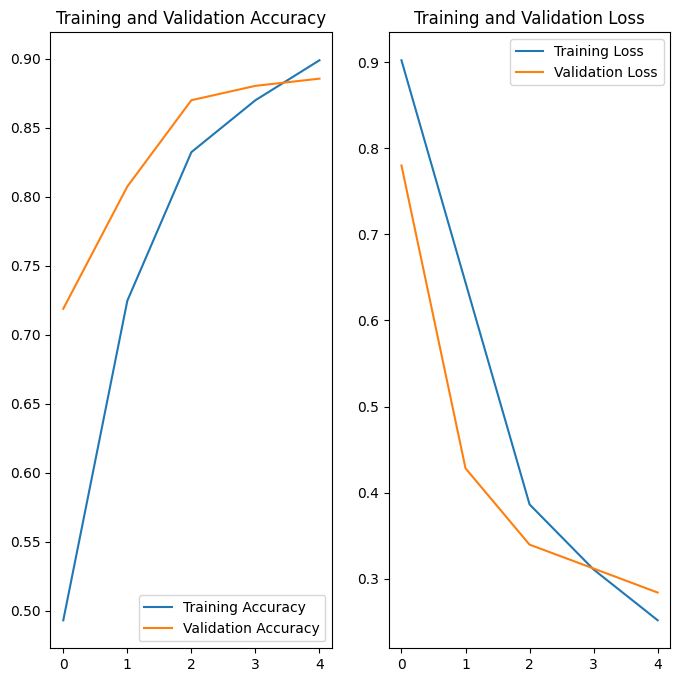

In [45]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 800ms/step
[3.0338618e-03 9.9678963e-01 1.7648182e-04]
1
predicted label:  Potato___Late_blight


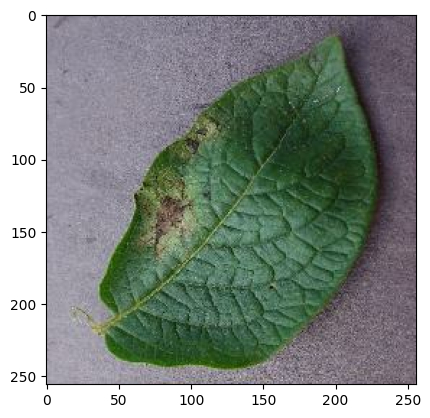

In [48]:
# Predicting for one sample
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])# This will give us the probalitiy of the 3 different classes
    print(np.argmax(batch_prediction[0]))# The index of the class with the highest probability
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])

In [49]:
# Function for inference
# This function takes a model and image as input and tells your it's confidence on the prediction
def predict(model, img):
    # The purpose of both functions is to convert a representation of an image into a NumPy array format. The .numpy() method converts a TensorFlow tensor (in this case, representing an image) into a NumPy array directly. Similarly, tf.keras.preprocessing.image.img_to_array() converts various image representations (such as PIL images or TensorFlow tensors) into NumPy arrays.
    # In this specific context, where images[i] is already a TensorFlow tensor, calling .numpy() on it is sufficient to convert it into a NumPy array. Therefore, using tf.keras.preprocessing.image.img_to_array() seems unnecessary and redundant
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) # Converting the image to array
    img_array = tf.expand_dims(img_array, 0) # This line adds an extra dimension to the array to make it compatible with the model's input shape. This is often necessary when making predictions with TensorFlow models.

    predictions = model.predict(img_array) # Predicting....!

    predicted_class = class_names[np.argmax(predictions[0])] # Getting the class name of the index with the highest probability 
    confidence = round(100 * (np.max(predictions[0])), 2) # This line calculates the confidence of the prediction by taking the maximum predicted probability and converting it to a percentage. It rounds the confidence to two decimal places.
    return predicted_class, confidence

1/1 [==============================] - 0s 364ms/step


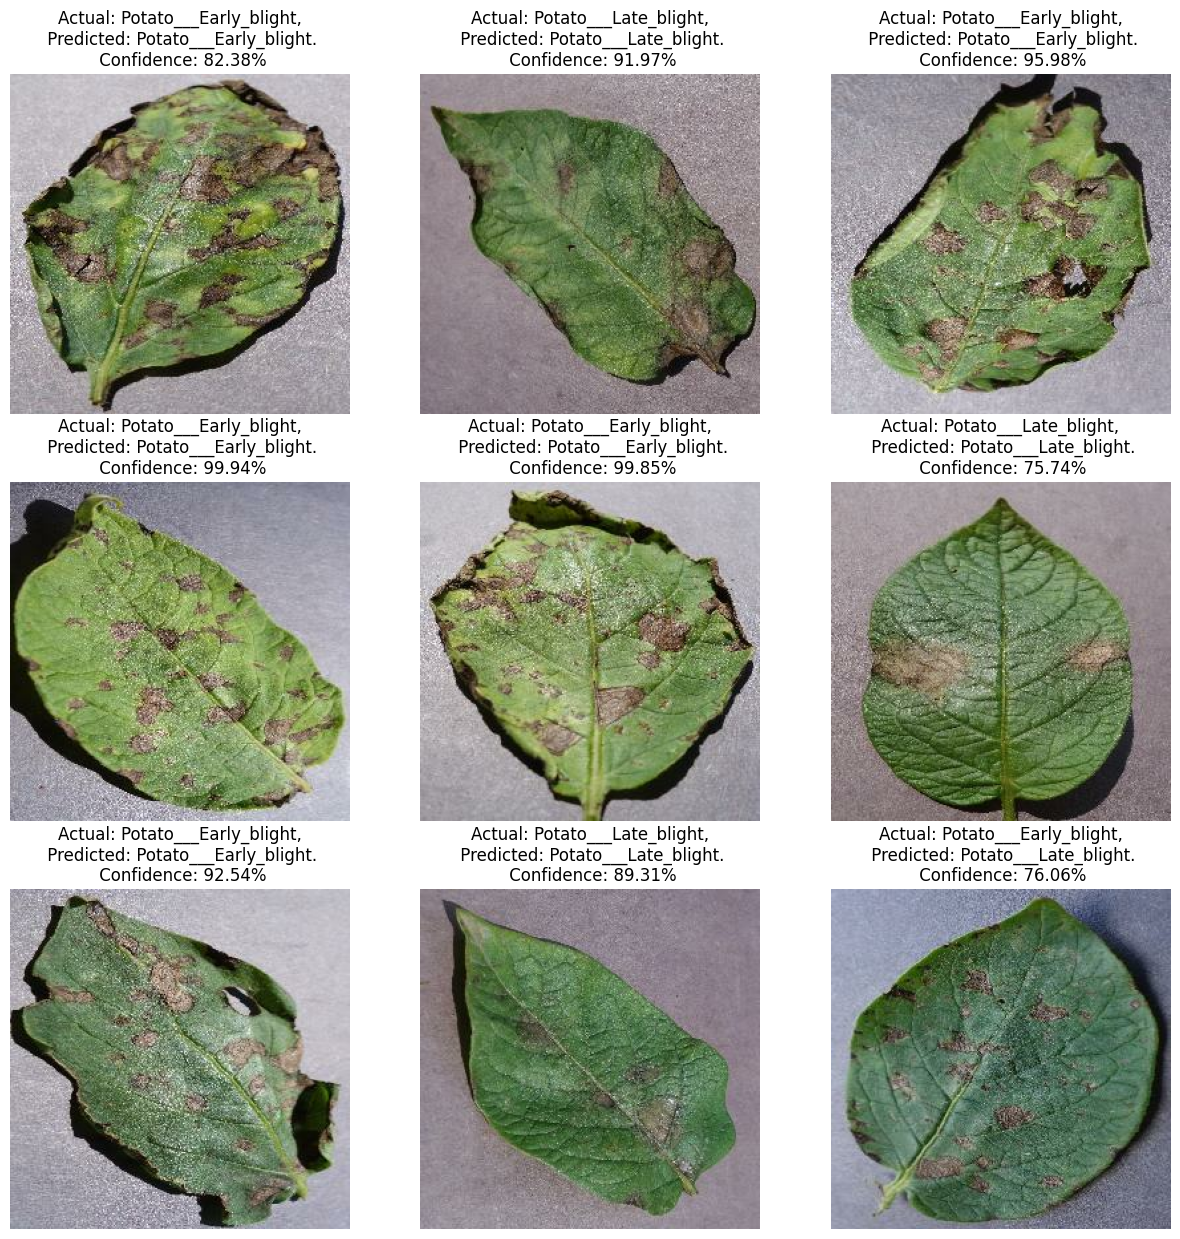

In [67]:
# Runing our prediction on the first batch of the test
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

### SAVING THE MODEL

In [64]:
# We append the model to the list of models as a new version
import os

# Using os.listdir we get the list of the direcotorires which are different models, we would be saving our model using number so when it return the name it would be in string so we use int() to convert it to integer
# We add 0 there so that we will always have something to do max([0]) so that if we don't have any model yet and we do max([]) it will not give use error because it would be max([]+[0]) which is equal to 0 and then we use +1 to get the current model version we want to save
# We are adding +1 to get the current version of this one we want to save
model_version = max([int(i) for i in os.listdir("saved_models")] + [0])+1 
model_version

3

In [65]:
model.save(f"saved_models/{model_version}")

INFO:tensorflow:Assets written to: saved_models/3\assets


INFO:tensorflow:Assets written to: saved_models/3\assets
